In [1]:
import pandas as pd
import numpy as np


In [2]:
hdb = pd.read_csv('../03_dataset_for_ML_model/HDB_with_distances.csv')

hdb.info()
hdb.describe()
    # count, mean, std, min, quartiles, max

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254525 entries, 0 to 254524
Data columns (total 20 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   month                                     254525 non-null  object 
 1   region                                    254525 non-null  object 
 2   town                                      254525 non-null  object 
 3   flat_type                                 254525 non-null  object 
 4   block                                     254525 non-null  object 
 5   street_name                               254525 non-null  object 
 6   storey_range                              254525 non-null  object 
 7   floor_area_sqm                            254525 non-null  float64
 8   flat_model                                254525 non-null  object 
 9   lease_commence_date                       254525 non-null  int64  
 10  remaining_lease     

/var/folders/77/zt_kswkd1wq7mnh3j_dbfc900000gn/T/ipykernel_61348/3732722624.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  hdb = pd.read_csv('../03_dataset_for_ML_model/HDB_with_distances.csv')


,floor_area_sqm,lease_commence_date,resale_price,latitude,longitude,distance_to_nearest_primary_school_km,distance_to_nearest_mrt_km,distance_to_nearest_hawker_km,distance_to_nearest_mall_km,distance_to_cbd_km,distance_to_nearest_high_value_school_km
count,254525.000000,254525.000000,2.545250e+05,254525.000000,254525.000000,254525.000000,254525.000000,254525.000000,254525.000000,254525.000000,254525.000000
mean,96.845007,1995.605508,5.092849e+05,1.367686,103.840898,0.417186,0.764367,0.749828,0.643718,3.329308,0.753364
std,24.051175,13.968253,1.811347e+05,0.042885,0.071359,0.253050,0.427547,0.516944,0.347477,1.851614,0.539857
min,31.000000,1966.000000,1.400000e+05,1.270380,103.685228,0.000000,0.019614,0.010256,0.005928,0.137312,0.038399
25%,80.000000,1985.000000,3.750000e+05,1.337054,103.778158,0.239114,0.449535,0.352958,0.382776,1.811171,0.384106
50%,93.000000,1996.000000,4.750000e+05,1.366660,103.846060,0.366079,0.683898,0.631198,0.593024,3.038022,0.624369
75%,112.000000,2006.000000,6.100000e+05,1.395800,103.898745,0.533685,0.985640,1.009145,0.847454,4.603113,0.945257
max,366.700000,2022.000000,1.658888e+06,1.457071,103.987804,3.296557,3.685013,2.864820,2.961707,8.380537,3.513914


In [3]:
# making  remaining_lease to numeric years, for example 61 years 04 months to 61.33
import re

def lease_to_years(s):
    if pd.isna(s):
        return None
    # pattern like "61 years 04 months"
    m = re.search(r'(\d+)\s*years?\s*(\d+)\s*months?', str(s))
    if not m:
        return None
    years = int(m.group(1))
    months = int(m.group(2))
    return years + months / 12.0

hdb['remaining_lease_years'] = hdb['remaining_lease'].apply(lease_to_years)


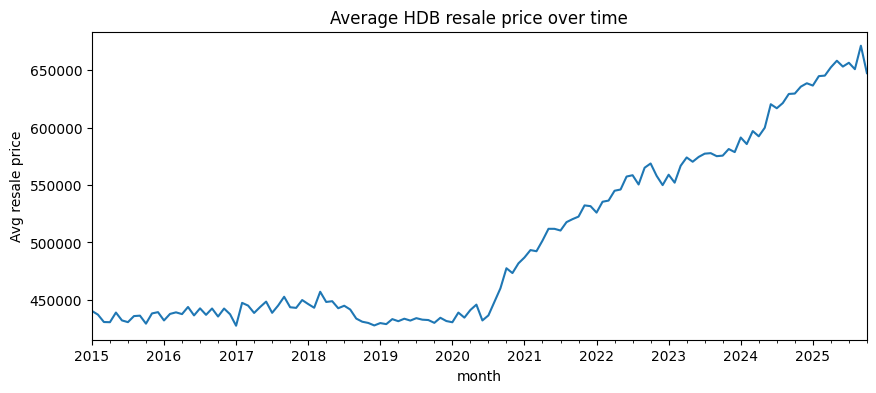

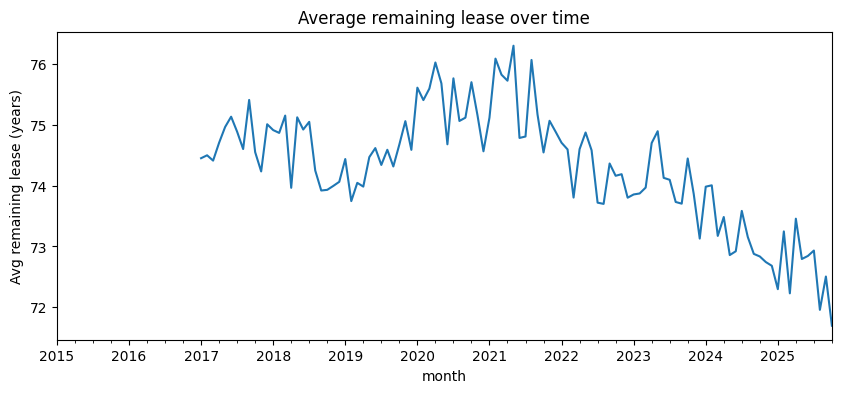

In [4]:
import matplotlib.pyplot as plt

# ensure month is datetime
hdb['month'] = pd.to_datetime(hdb['month'])

# average price over time
price_by_month = hdb.groupby('month')['resale_price'].mean()
price_by_month.plot(figsize=(10,4))
plt.ylabel('Avg resale price')
plt.title('Average HDB resale price over time')
plt.show()

# average remaining lease (in years) over time
lease_by_month = hdb.groupby('month')['remaining_lease_years'].mean()
lease_by_month.plot(figsize=(10,4))
plt.ylabel('Avg remaining lease (years)')
plt.title('Average remaining lease over time')
plt.show()


# this shows the dataset is non stationery and since it is time series we are including time to account for that

In [5]:
# extract calendar year from the month column (e.g., 2017, 2018, ...)
hdb['year'] = hdb['month'].dt.year

# extract numeric month (1–12) so the model can learn seasonality
hdb['month_num'] = hdb['month'].dt.month

# extract calendar quarter (1–4) to capture broader time periods
hdb['quarter'] = hdb['month'].dt.quarter


In [6]:
hdb.head(10)

,month,region,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,distance_to_nearest_primary_school_km,distance_to_nearest_mrt_km,distance_to_nearest_hawker_km,distance_to_nearest_mall_km,distance_to_cbd_km,distance_to_nearest_high_value_school_km,remaining_lease_years,year,month_num,quarter
0,2017-01-01,RCR,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,...,0.229176,1.007828,0.172421,1.031165,5.710788,1.132206,61.333333,2017,1,1
1,2017-01-01,RCR,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,...,0.242230,0.347375,0.410549,0.869084,5.640185,0.542722,60.583333,2017,1,1
2,2017-01-01,RCR,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,...,0.775873,0.465179,0.585526,1.529048,5.063082,0.766363,62.416667,2017,1,1
3,2017-01-01,RCR,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,...,0.690955,0.943668,0.245974,0.891970,5.158698,0.880945,62.083333,2017,1,1
4,2017-01-01,RCR,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,...,0.781447,0.428090,0.611023,1.572926,5.058367,0.799446,62.416667,2017,1,1
5,2017-01-01,RCR,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,...,0.135420,0.654237,0.404997,0.696727,4.867646,0.916820,NaN,2017,1,1
6,2017-01-01,RCR,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,...,0.587394,0.760243,0.096076,0.875350,5.060532,0.683459,61.500000,2017,1,1
7,2017-01-01,RCR,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1976,...,0.522957,0.652203,0.299888,0.877187,5.953272,1.092916,58.333333,2017,1,1
8,2017-01-01,RCR,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,...,0.587394,0.760243,0.096076,0.875350,5.060532,0.683459,61.500000,2017,1,1
9,2017-01-01,RCR,ANG MO KIO,3 ROOM,571,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1979,...,0.406382,0.585928,0.259782,0.730031,4.826676,0.406382,61.333333,2017,1,1


In [7]:
print(hdb["region"].unique())
print(hdb["town"].unique())
print(hdb["flat_type"].unique())


['RCR' 'CCR' 'OCR']
['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']
['2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' '1 ROOM'
 'MULTI-GENERATION']


In [8]:
hdb["remaining_lease_years"].unique()

array([61.33333333, 60.58333333, 62.41666667, 62.08333333,         nan,
       61.5       , 58.33333333, 59.66666667, 59.5       , 62.66666667,
       60.83333333, 59.25      , 61.41666667, 60.33333333, 60.25      ,
       63.75      , 61.08333333, 61.83333333, 58.5       , 59.33333333,
       62.91666667, 60.66666667, 93.66666667, 93.58333333, 60.08333333,
       94.66666667, 78.33333333, 60.5       , 62.5       , 70.66666667,
       63.33333333, 63.5       , 67.58333333, 61.58333333, 68.16666667,
       68.25      , 67.75      , 67.41666667, 63.58333333, 66.25      ,
       65.33333333, 69.41666667, 59.91666667, 60.41666667, 69.16666667,
       69.25      , 68.83333333, 62.83333333, 64.33333333, 66.08333333,
       83.08333333, 87.91666667, 71.16666667, 92.33333333, 54.5       ,
       78.5       , 82.91666667, 75.33333333, 66.58333333, 66.5       ,
       75.91666667, 68.33333333, 55.75      , 68.58333333, 67.91666667,
       69.08333333, 69.91666667, 74.5       , 74.33333333, 69.5 

In [9]:
hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254525 entries, 0 to 254524
Data columns (total 24 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   month                                     254525 non-null  datetime64[ns]
 1   region                                    254525 non-null  object        
 2   town                                      254525 non-null  object        
 3   flat_type                                 254525 non-null  object        
 4   block                                     254525 non-null  object        
 5   street_name                               254525 non-null  object        
 6   storey_range                              254525 non-null  object        
 7   floor_area_sqm                            254525 non-null  float64       
 8   flat_model                                254525 non-null  object        
 9   lease_commence_

In [10]:
# 1) REGION -> compact integer code (keep original + any dummies)
region_map = {'CCR': 0, 'RCR': 1, 'OCR': 2}
hdb['region_code'] = hdb['region'].map(region_map)   # new numeric region feature

# 2) TOWN -> target-encoded numeric (keep original + any dummies)
town_mean_price = hdb.groupby('town')['resale_price'].mean()
hdb['town_te_price'] = hdb['town'].map(town_mean_price)   # town encoded by avg resale price

# 3) FLAT_TYPE -> ordinal integer (keep original)
flat_type_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI-GENERATION': 7
}
hdb['flat_type_int'] = hdb['flat_type'].map(flat_type_mapping)

# 4) FLAT_MODEL -> grouped label encoding (keep original and any dummies)
model_counts = hdb['flat_model'].value_counts()
common_models = model_counts[model_counts > 500].index   # threshold adjustable

hdb['flat_model_grouped'] = hdb['flat_model'].where(
    hdb['flat_model'].isin(common_models), 'OTHER'
)

flat_model_codes = {m: i for i, m in enumerate(sorted(hdb['flat_model_grouped'].unique()))}
hdb['flat_model_code'] = hdb['flat_model_grouped'].map(flat_model_codes)

# 5) lease_commence_date -> datetime + numeric year (no columns removed)
hdb['lease_commence_date'] = pd.to_datetime(
    hdb['lease_commence_date'].astype(str),
    format='%Y',
    errors='coerce'
)
hdb['lease_commence_year'] = hdb['lease_commence_date'].dt.year


In [11]:
print(hdb.columns.tolist())


['month', 'region', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'remaining_lease', 'resale_price', 'latitude', 'longitude', 'distance_to_nearest_primary_school_km', 'distance_to_nearest_mrt_km', 'distance_to_nearest_hawker_km', 'distance_to_nearest_mall_km', 'distance_to_cbd_km', 'distance_to_nearest_high_value_school_km', 'remaining_lease_years', 'year', 'month_num', 'quarter', 'region_code', 'town_te_price', 'flat_type_int', 'flat_model_grouped', 'flat_model_code', 'lease_commence_year']


In [12]:
# columns you want to keep
keep_cols = [
    'storey_range',                 # keep for now, even though it's object
    'floor_area_sqm',
    'lease_commence_year',
    'remaining_lease_years',
    'resale_price',
    'distance_to_nearest_primary_school_km',
    'distance_to_nearest_high_value_school_km',
    'distance_to_nearest_mrt_km',
    'distance_to_nearest_hawker_km',
    'distance_to_nearest_mall_km',
    'distance_to_cbd_km',
    'year',
    'month_num',
    'quarter',
    'region_code',
    'town_te_price',
    'flat_type_int',
    'flat_model_code'
]

# create a new DataFrame with only these columns
hdb_model = hdb[keep_cols].copy()


In [13]:
hdb_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254525 entries, 0 to 254524
Data columns (total 18 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   storey_range                              254525 non-null  object 
 1   floor_area_sqm                            254525 non-null  float64
 2   lease_commence_year                       254525 non-null  int32  
 3   remaining_lease_years                     199542 non-null  float64
 4   resale_price                              254525 non-null  float64
 5   distance_to_nearest_primary_school_km     254525 non-null  float64
 6   distance_to_nearest_high_value_school_km  254525 non-null  float64
 7   distance_to_nearest_mrt_km                254525 non-null  float64
 8   distance_to_nearest_hawker_km             254525 non-null  float64
 9   distance_to_nearest_mall_km               254525 non-null  float64
 10  distance_to_cbd_km  

In [14]:
hdb_model.head()

,storey_range,floor_area_sqm,lease_commence_year,remaining_lease_years,resale_price,distance_to_nearest_primary_school_km,distance_to_nearest_high_value_school_km,distance_to_nearest_mrt_km,distance_to_nearest_hawker_km,distance_to_nearest_mall_km,distance_to_cbd_km,year,month_num,quarter,region_code,town_te_price,flat_type_int,flat_model_code
0,10 TO 12,44.0,1979,61.333333,232000.0,0.229176,1.132206,1.007828,0.172421,1.031165,5.710788,2017,1,1,1,464118.584332,2,2
1,01 TO 03,67.0,1978,60.583333,250000.0,0.242230,0.542722,0.347375,0.410549,0.869084,5.640185,2017,1,1,1,464118.584332,3,6
2,01 TO 03,67.0,1980,62.416667,262000.0,0.775873,0.766363,0.465179,0.585526,1.529048,5.063082,2017,1,1,1,464118.584332,3,6
3,04 TO 06,68.0,1980,62.083333,265000.0,0.690955,0.880945,0.943668,0.245974,0.891970,5.158698,2017,1,1,1,464118.584332,3,6
4,01 TO 03,67.0,1980,62.416667,265000.0,0.781447,0.799446,0.428090,0.611023,1.572926,5.058367,2017,1,1,1,464118.584332,3,6


In [15]:
# 0) Make sure hdb has 'year' first
hdb['month'] = pd.to_datetime(hdb['month'])            # if not already done
hdb['year'] = hdb['month'].dt.year.astype('int32')     # create year in hdb

# 1) Attach town and year from hdb to hdb_model
hdb_model = hdb_model.copy()
hdb_model['town'] = hdb['town'].values
hdb_model['year'] = hdb['year'].values

# 2) Year-wise target encoding: avg resale_price by (town, year)
town_year_mean = (
    hdb
    .groupby(['town', 'year'])['resale_price']
    .mean()
    .rename('town_year_te_price')
)

hdb_model = hdb_model.join(town_year_mean, on=['town', 'year'])

overall_town_mean = hdb.groupby('town')['resale_price'].mean()
hdb_model['town_year_te_price'] = np.where(
    hdb_model['town_year_te_price'].isna(),
    hdb_model['town'].map(overall_town_mean),
    hdb_model['town_year_te_price']
)

# 3) Add integer town_code
town_code_map = {town: i for i, town in enumerate(sorted(hdb['town'].unique()))}
hdb_model['town_code'] = hdb_model['town'].map(town_code_map)

# 4) Drop raw town and old town_te_price if present
drop_cols = [c for c in ['town', 'town_te_price'] if c in hdb_model.columns]
hdb_model.drop(columns=drop_cols, inplace=True)


In [16]:
hdb_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254525 entries, 0 to 254524
Data columns (total 19 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   storey_range                              254525 non-null  object 
 1   floor_area_sqm                            254525 non-null  float64
 2   lease_commence_year                       254525 non-null  int32  
 3   remaining_lease_years                     199542 non-null  float64
 4   resale_price                              254525 non-null  float64
 5   distance_to_nearest_primary_school_km     254525 non-null  float64
 6   distance_to_nearest_high_value_school_km  254525 non-null  float64
 7   distance_to_nearest_mrt_km                254525 non-null  float64
 8   distance_to_nearest_hawker_km             254525 non-null  float64
 9   distance_to_nearest_mall_km               254525 non-null  float64
 10  distance_to_cbd_km  

In [17]:
hdb_model.head(10)

,storey_range,floor_area_sqm,lease_commence_year,remaining_lease_years,resale_price,distance_to_nearest_primary_school_km,distance_to_nearest_high_value_school_km,distance_to_nearest_mrt_km,distance_to_nearest_hawker_km,distance_to_nearest_mall_km,distance_to_cbd_km,year,month_num,quarter,region_code,flat_type_int,flat_model_code,town_year_te_price,town_code
0,10 TO 12,44.0,1979,61.333333,232000.0,0.229176,1.132206,1.007828,0.172421,1.031165,5.710788,2017,1,1,1,2,2,422493.497877,0
1,01 TO 03,67.0,1978,60.583333,250000.0,0.242230,0.542722,0.347375,0.410549,0.869084,5.640185,2017,1,1,1,3,6,422493.497877,0
2,01 TO 03,67.0,1980,62.416667,262000.0,0.775873,0.766363,0.465179,0.585526,1.529048,5.063082,2017,1,1,1,3,6,422493.497877,0
3,04 TO 06,68.0,1980,62.083333,265000.0,0.690955,0.880945,0.943668,0.245974,0.891970,5.158698,2017,1,1,1,3,6,422493.497877,0
4,01 TO 03,67.0,1980,62.416667,265000.0,0.781447,0.799446,0.428090,0.611023,1.572926,5.058367,2017,1,1,1,3,6,422493.497877,0
5,01 TO 03,68.0,1981,NaN,275000.0,0.135420,0.916820,0.654237,0.404997,0.696727,4.867646,2017,1,1,1,3,6,422493.497877,0
6,04 TO 06,68.0,1979,61.500000,280000.0,0.587394,0.683459,0.760243,0.096076,0.875350,5.060532,2017,1,1,1,3,6,422493.497877,0
7,04 TO 06,67.0,1976,58.333333,285000.0,0.522957,1.092916,0.652203,0.299888,0.877187,5.953272,2017,1,1,1,3,6,422493.497877,0
8,04 TO 06,68.0,1979,61.500000,285000.0,0.587394,0.683459,0.760243,0.096076,0.875350,5.060532,2017,1,1,1,3,6,422493.497877,0
9,01 TO 03,67.0,1979,61.333333,285000.0,0.406382,0.406382,0.585928,0.259782,0.730031,4.826676,2017,1,1,1,3,6,422493.497877,0


In [18]:
hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254525 entries, 0 to 254524
Data columns (total 30 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   month                                     254525 non-null  datetime64[ns]
 1   region                                    254525 non-null  object        
 2   town                                      254525 non-null  object        
 3   flat_type                                 254525 non-null  object        
 4   block                                     254525 non-null  object        
 5   street_name                               254525 non-null  object        
 6   storey_range                              254525 non-null  object        
 7   floor_area_sqm                            254525 non-null  float64       
 8   flat_model                                254525 non-null  object        
 9   lease_commence_

In [19]:
hdb["remaining_lease"]

0         61 years 04 months
1         60 years 07 months
2         62 years 05 months
3          62 years 01 month
4         62 years 05 months
                 ...        
254520                    82
254521                    69
254522                    74
254523                    70
254524                    70
Name: remaining_lease, Length: 254525, dtype: object

In [20]:
# 1) How many rows overall?
print("Rows in hdb:", hdb.shape[0])

# 2) How many missing in remaining_lease_years?
missing_lease_years = hdb['remaining_lease_years'].isna().sum()
print("NaNs in remaining_lease_years:", missing_lease_years)

# 3) Look at some problematic rows
hdb[hdb['remaining_lease_years'].isna()][['remaining_lease']].head(20)


Rows in hdb: 254525
NaNs in remaining_lease_years: 54983


,remaining_lease
5,63 years
15,60 years
18,61 years
22,61 years
26,63 years
28,63 years
29,62 years
31,62 years
36,63 years
50,61 years


In [21]:
# 1) Check what columns hdb has right now
print(hdb.columns.tolist())


['month', 'region', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'remaining_lease', 'resale_price', 'latitude', 'longitude', 'distance_to_nearest_primary_school_km', 'distance_to_nearest_mrt_km', 'distance_to_nearest_hawker_km', 'distance_to_nearest_mall_km', 'distance_to_cbd_km', 'distance_to_nearest_high_value_school_km', 'remaining_lease_years', 'year', 'month_num', 'quarter', 'region_code', 'town_te_price', 'flat_type_int', 'flat_model_grouped', 'flat_model_code', 'lease_commence_year']


In [22]:
import re
import numpy as np

def lease_to_years(s):
    if pd.isna(s):
        return np.nan
    # handle patterns like "61 years 04 months" or "61 years"
    text = str(s)

    # full years + months
    m = re.search(r'(\d+)\s*years?\s*(\d+)\s*months?', text)
    if m:
        years = int(m.group(1))
        months = int(m.group(2))
        return years + months / 12.0

    # only years (no months written)
    m2 = re.search(r'(\d+)\s*years?', text)
    if m2:
        years = int(m2.group(1))
        return float(years)

    return np.nan

hdb['remaining_lease_years'] = hdb['remaining_lease'].apply(lease_to_years)


In [23]:
print("Rows in hdb:", hdb.shape[0])
print("NaNs in remaining_lease_years:", hdb['remaining_lease_years'].isna().sum())
hdb[hdb['remaining_lease_years'].isna()][['remaining_lease']].head()


Rows in hdb: 254525
NaNs in remaining_lease_years: 37153


,remaining_lease
217372,70
217373,65
217374,64
217375,63
217376,64


In [24]:
# make sure shapes align: same number of rows
print(hdb.shape[0], hdb_model.shape[0])

# overwrite / attach from the clean source
hdb_model['remaining_lease_years'] = hdb['remaining_lease_years'].values


254525 254525


In [25]:
hdb_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254525 entries, 0 to 254524
Data columns (total 19 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   storey_range                              254525 non-null  object 
 1   floor_area_sqm                            254525 non-null  float64
 2   lease_commence_year                       254525 non-null  int32  
 3   remaining_lease_years                     217372 non-null  float64
 4   resale_price                              254525 non-null  float64
 5   distance_to_nearest_primary_school_km     254525 non-null  float64
 6   distance_to_nearest_high_value_school_km  254525 non-null  float64
 7   distance_to_nearest_mrt_km                254525 non-null  float64
 8   distance_to_nearest_hawker_km             254525 non-null  float64
 9   distance_to_nearest_mall_km               254525 non-null  float64
 10  distance_to_cbd_km  

In [26]:
# Extract floor range as two new numeric columns
hdb_model['floor_level'] = hdb_model['storey_range'].str.split(' TO ').str[0].astype(int)
hdb_model['height_of_block'] = hdb_model['storey_range'].str.split(' TO ').str[1].astype(int)

# Optionally, drop the original storey_range if no longer needed:
# hdb_model = hdb_model.drop(columns=['storey_range'])


In [27]:
hdb_model.head(10)

,storey_range,floor_area_sqm,lease_commence_year,remaining_lease_years,resale_price,distance_to_nearest_primary_school_km,distance_to_nearest_high_value_school_km,distance_to_nearest_mrt_km,distance_to_nearest_hawker_km,distance_to_nearest_mall_km,...,year,month_num,quarter,region_code,flat_type_int,flat_model_code,town_year_te_price,town_code,floor_level,height_of_block
0,10 TO 12,44.0,1979,61.333333,232000.0,0.229176,1.132206,1.007828,0.172421,1.031165,...,2017,1,1,1,2,2,422493.497877,0,10,12
1,01 TO 03,67.0,1978,60.583333,250000.0,0.242230,0.542722,0.347375,0.410549,0.869084,...,2017,1,1,1,3,6,422493.497877,0,1,3
2,01 TO 03,67.0,1980,62.416667,262000.0,0.775873,0.766363,0.465179,0.585526,1.529048,...,2017,1,1,1,3,6,422493.497877,0,1,3
3,04 TO 06,68.0,1980,62.083333,265000.0,0.690955,0.880945,0.943668,0.245974,0.891970,...,2017,1,1,1,3,6,422493.497877,0,4,6
4,01 TO 03,67.0,1980,62.416667,265000.0,0.781447,0.799446,0.428090,0.611023,1.572926,...,2017,1,1,1,3,6,422493.497877,0,1,3
5,01 TO 03,68.0,1981,63.000000,275000.0,0.135420,0.916820,0.654237,0.404997,0.696727,...,2017,1,1,1,3,6,422493.497877,0,1,3
6,04 TO 06,68.0,1979,61.500000,280000.0,0.587394,0.683459,0.760243,0.096076,0.875350,...,2017,1,1,1,3,6,422493.497877,0,4,6
7,04 TO 06,67.0,1976,58.333333,285000.0,0.522957,1.092916,0.652203,0.299888,0.877187,...,2017,1,1,1,3,6,422493.497877,0,4,6
8,04 TO 06,68.0,1979,61.500000,285000.0,0.587394,0.683459,0.760243,0.096076,0.875350,...,2017,1,1,1,3,6,422493.497877,0,4,6
9,01 TO 03,67.0,1979,61.333333,285000.0,0.406382,0.406382,0.585928,0.259782,0.730031,...,2017,1,1,1,3,6,422493.497877,0,1,3


In [28]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


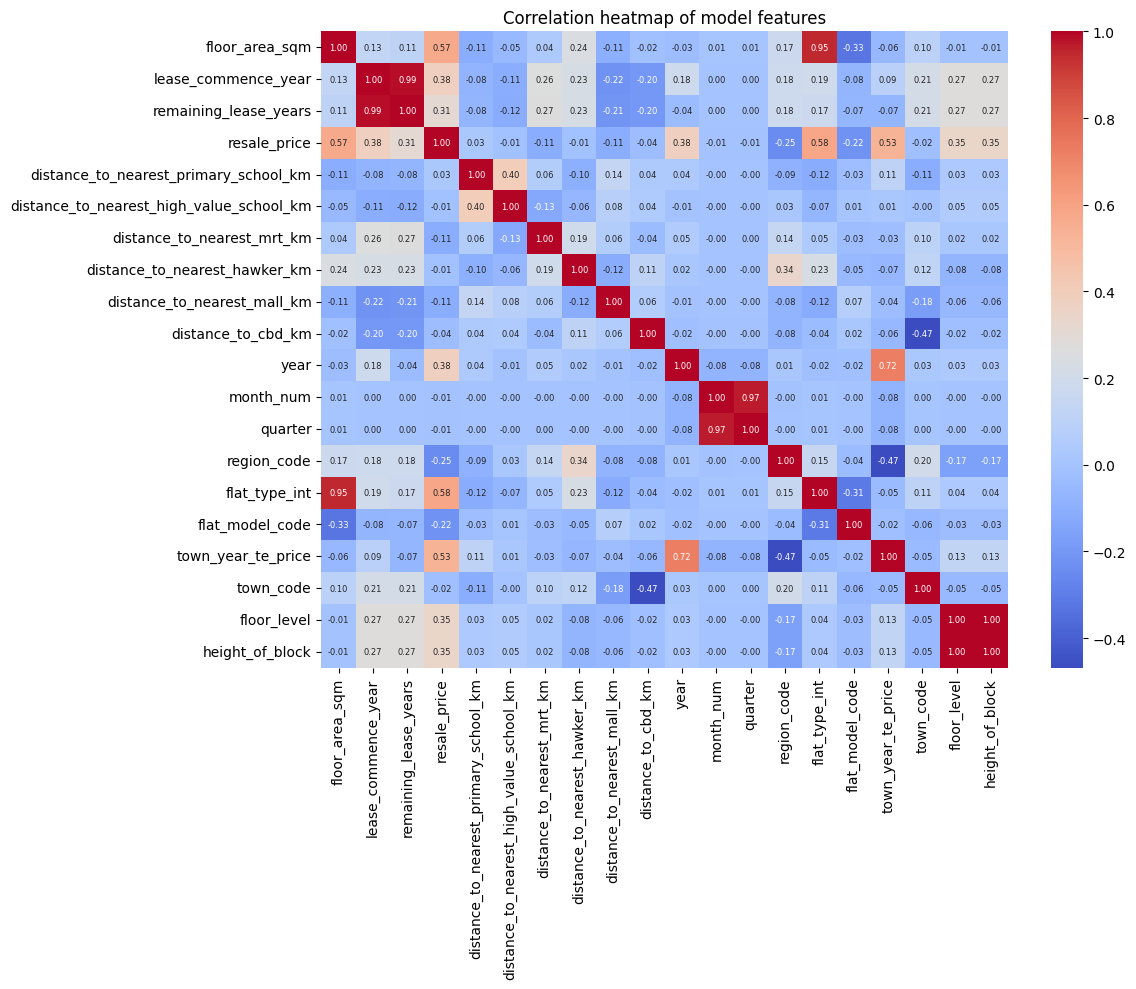

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Drop storey_range and keep only numeric columns
num_df = hdb_model.drop(columns=['storey_range'])
num_df = num_df.select_dtypes(include=['number'])

# 2) Compute correlation matrix
corr = num_df.corr()

# 3) Plot heatmap with annotations
plt.figure(figsize=(12, 10))  # slightly bigger so text fits better
sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,       # show values in boxes
    fmt=".2f",        # 2 decimal places
    annot_kws={"size": 6}  # smaller font so it fits
)
plt.title('Correlation heatmap of model features')
plt.tight_layout()
plt.show()



In [30]:
# take only numeric columns
num_df = hdb_model.select_dtypes(include=['number'])

# correlation of each feature with resale_price
corr_with_price = num_df.corr()['resale_price'].sort_values(ascending=False)
print(corr_with_price)


resale_price                                1.000000
flat_type_int                               0.584464
floor_area_sqm                              0.572826
town_year_te_price                          0.533338
year                                        0.384970
lease_commence_year                         0.383696
height_of_block                             0.345811
floor_level                                 0.345811
remaining_lease_years                       0.306114
distance_to_nearest_primary_school_km       0.027176
month_num                                  -0.006153
quarter                                    -0.006304
distance_to_nearest_high_value_school_km   -0.011040
distance_to_nearest_hawker_km              -0.012387
town_code                                  -0.024277
distance_to_cbd_km                         -0.036566
distance_to_nearest_mrt_km                 -0.108172
distance_to_nearest_mall_km                -0.109119
flat_model_code                            -0.

In [31]:
hdb_model["flat_type_int"].unique()

array([2, 3, 4, 5, 6, 1, 7])

In [32]:
import pandas as pd
from pathlib import Path

# assume these dicts already exist
# region_map, town_code_map, flat_type_mapping, flat_model_codes

mapping_dir = Path("mappings_csv")
mapping_dir.mkdir(exist_ok=True)

def save_mapping_csv(mapping: dict, filename: str, key_name: str, value_name: str):
    df = pd.DataFrame(
        list(mapping.items()),
        columns=[key_name, value_name]
    )
    df.to_csv(mapping_dir / filename, index=False)

save_mapping_csv(region_map,       "region_code_map.csv",      "region",    "region_code")
save_mapping_csv(town_code_map,   "town_code_map.csv",        "town",      "town_code")
save_mapping_csv(flat_type_mapping, "flat_type_int_map.csv",  "flat_type", "flat_type_int")
save_mapping_csv(flat_model_codes,  "flat_model_code_map.csv","flat_model_grouped","flat_model_code")


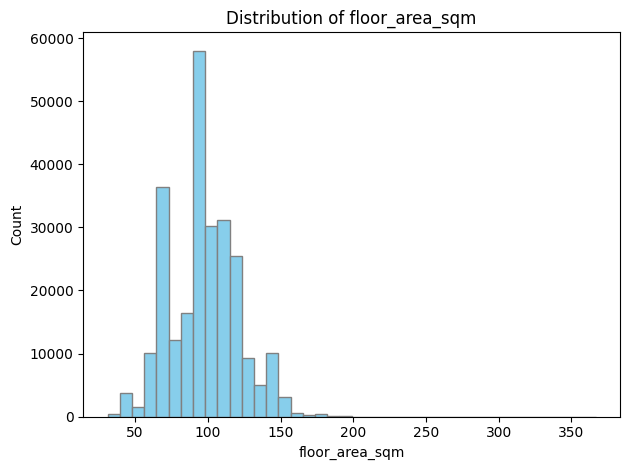

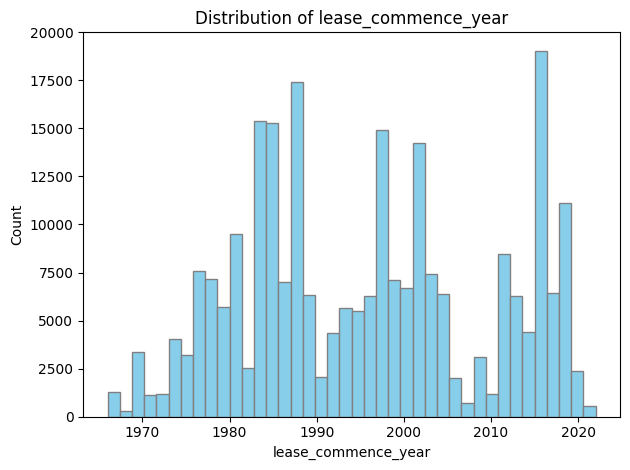

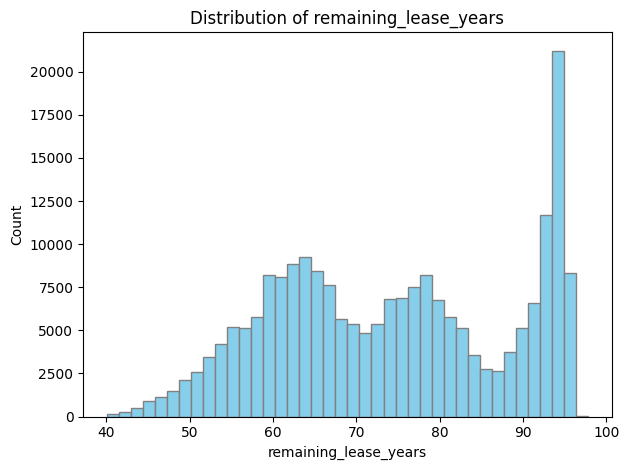

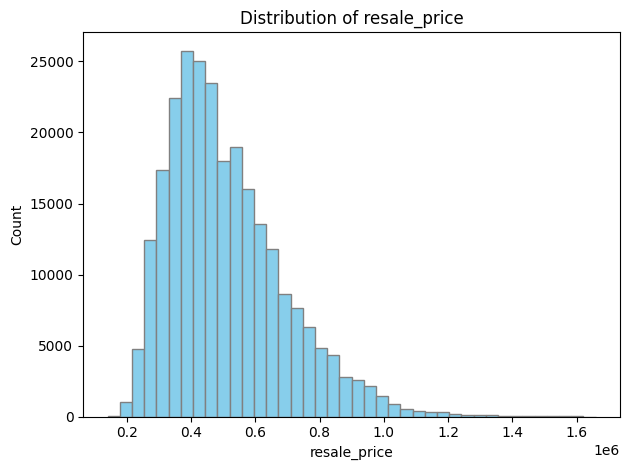

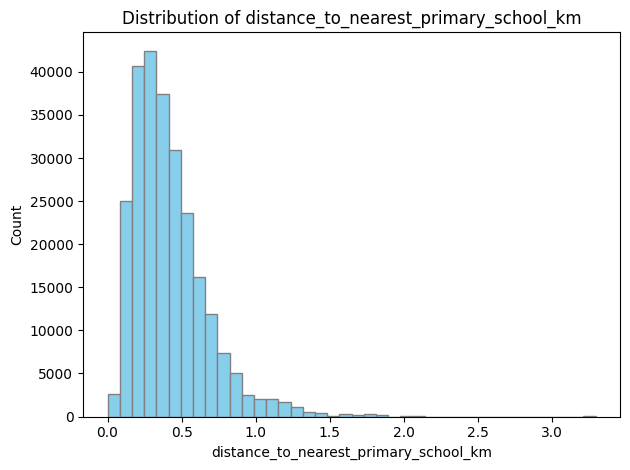

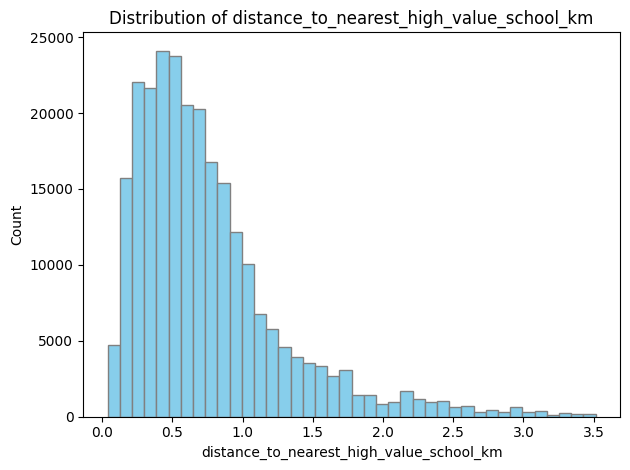

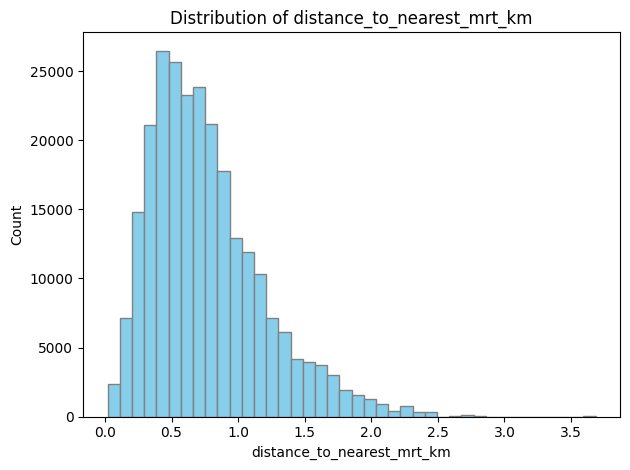

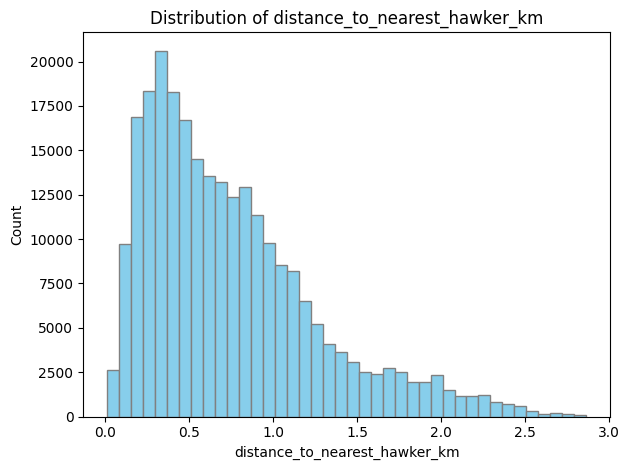

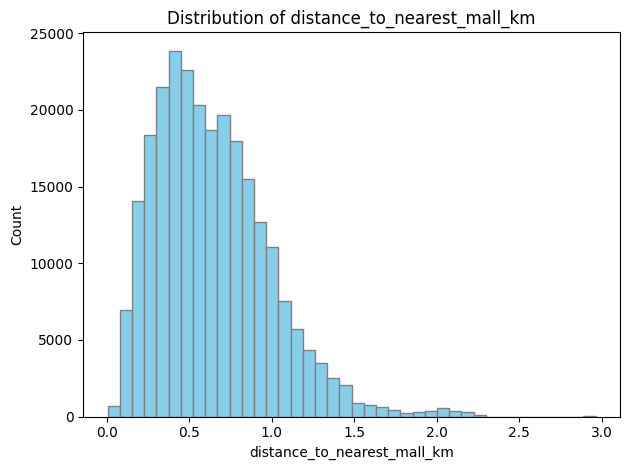

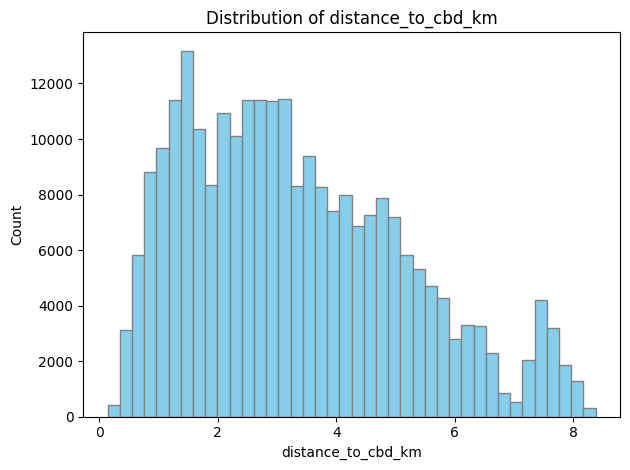

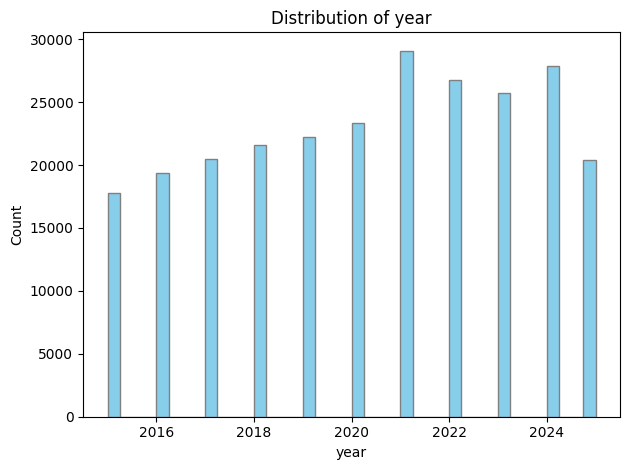

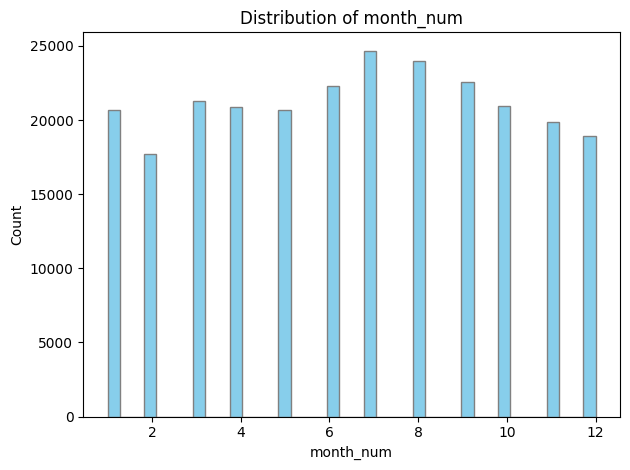

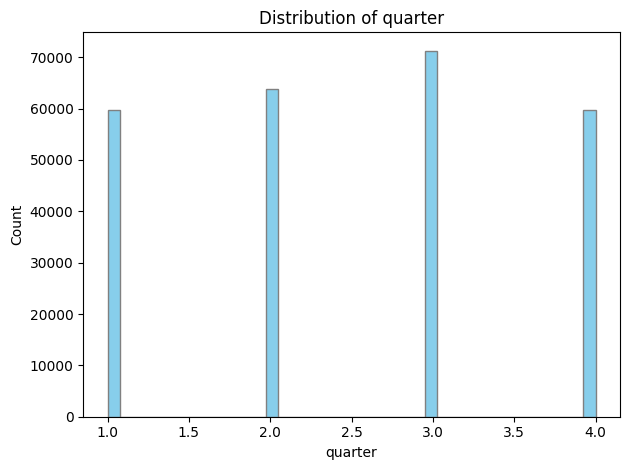

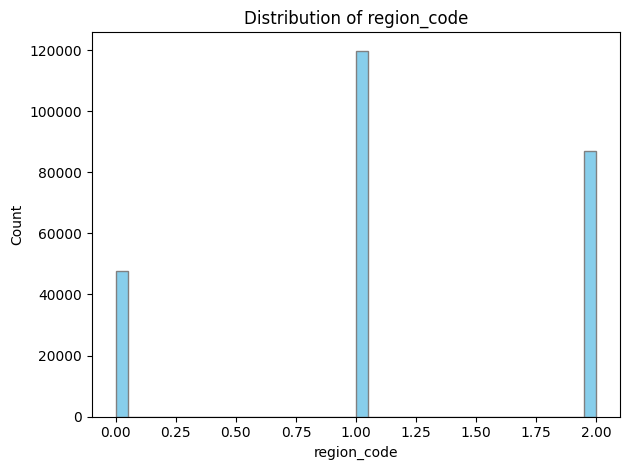

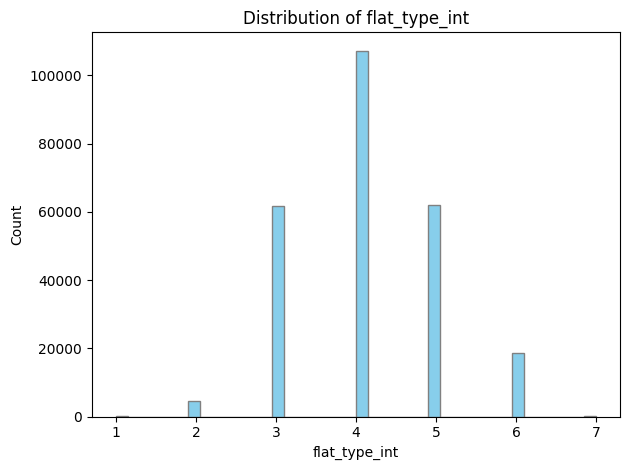

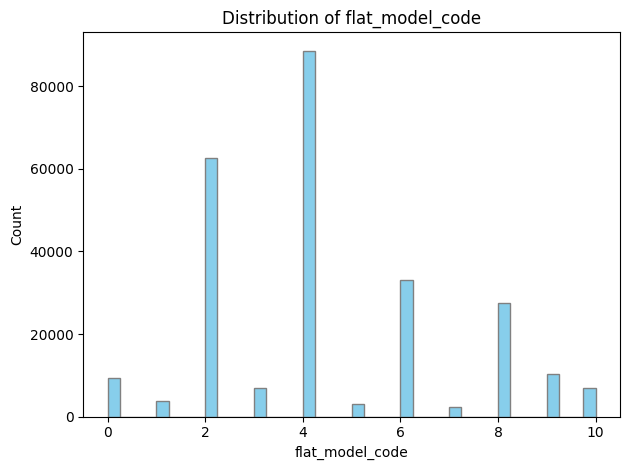

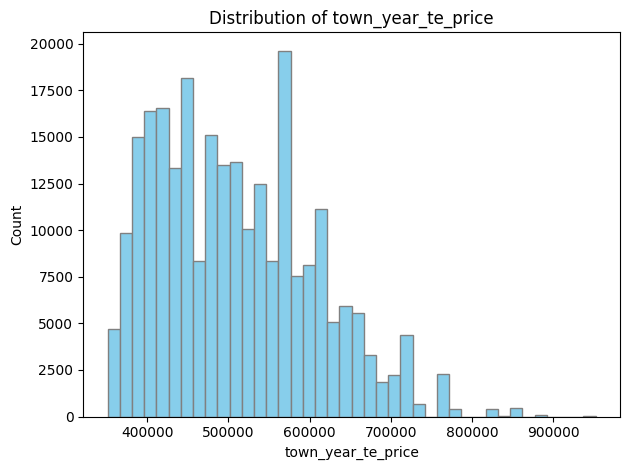

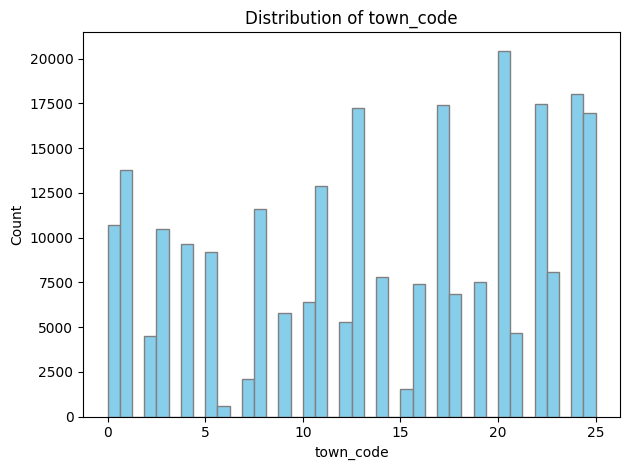

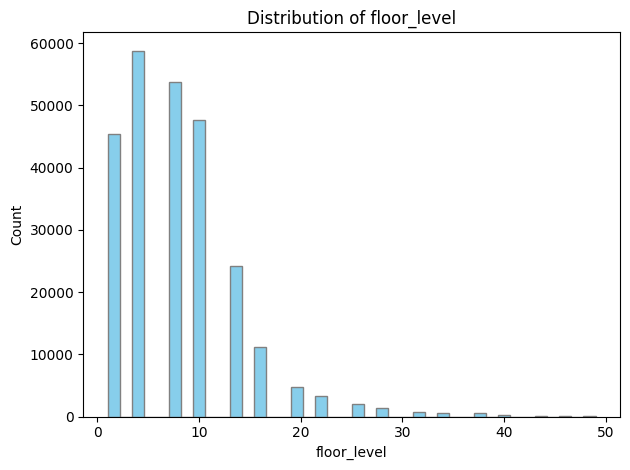

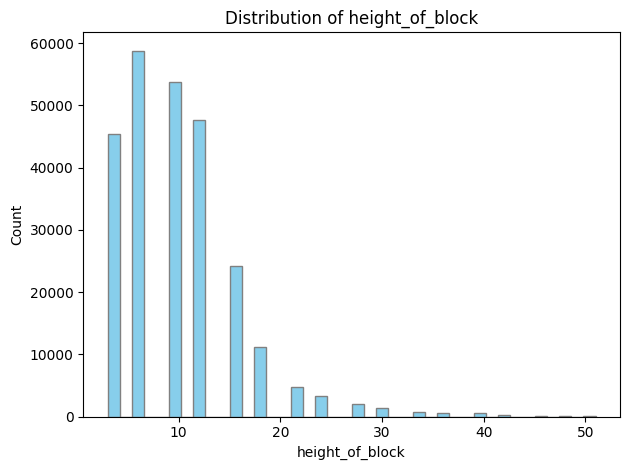

In [33]:
import matplotlib.pyplot as plt

num_df = hdb_model.select_dtypes(include=['number'])

for col in num_df.columns:
    plt.figure()
    plt.hist(num_df[col], bins=40, color='skyblue', edgecolor='gray')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


In [34]:
from scipy.stats import normaltest, shapiro

for col in num_df.columns:
    data = num_df[col].dropna()
    # use normaltest (D’Agostino and Pearson)
    stat, p = normaltest(data)
    print(f"{col:30s}: p = {p:.4g}")


floor_area_sqm                : p = 0
lease_commence_year           : p = 0
remaining_lease_years         : p = 0
resale_price                  : p = 0
distance_to_nearest_primary_school_km: p = 0
distance_to_nearest_high_value_school_km: p = 0
distance_to_nearest_mrt_km    : p = 0
distance_to_nearest_hawker_km : p = 0
distance_to_nearest_mall_km   : p = 0
distance_to_cbd_km            : p = 0
year                          : p = 0
month_num                     : p = 0
quarter                       : p = 0
region_code                   : p = 0
flat_type_int                 : p = 0
flat_model_code               : p = 0
town_year_te_price            : p = 0
town_code                     : p = 0
floor_level                   : p = 0
height_of_block               : p = 0


In [35]:
corr = hdb_model.select_dtypes(include='number').corr().abs()
print(corr)
# Filter for highly correlated pairs
high_corr = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)) > 0.9).stack()
print(high_corr)


                                          floor_area_sqm  lease_commence_year  \
floor_area_sqm                                  1.000000             0.130543   
lease_commence_year                             0.130543             1.000000   
remaining_lease_years                           0.108977             0.985109   
resale_price                                    0.572826             0.383696   
distance_to_nearest_primary_school_km           0.108011             0.082797   
distance_to_nearest_high_value_school_km        0.050136             0.111257   
distance_to_nearest_mrt_km                      0.041443             0.260279   
distance_to_nearest_hawker_km                   0.243892             0.231358   
distance_to_nearest_mall_km                     0.105338             0.220189   
distance_to_cbd_km                              0.020505             0.200224   
year                                            0.032580             0.184187   
month_num                   

In [36]:
import numpy as np

# Compute absolute correlation matrix for numeric columns
corr = hdb_model.select_dtypes(include='number').corr()

# Mask the lower triangle & diagonal to prevent duplicate pairs/self-pairs
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Stack pairs and filter for abs(corr) > 0.8
high_corr = corr.where(mask).stack()
high_corr = high_corr[(high_corr > 0.70) | (high_corr < -0.70)]

print(high_corr)


floor_area_sqm       flat_type_int            0.951968
lease_commence_year  remaining_lease_years    0.985109
year                 town_year_te_price       0.721811
month_num            quarter                  0.969423
floor_level          height_of_block          1.000000
dtype: float64


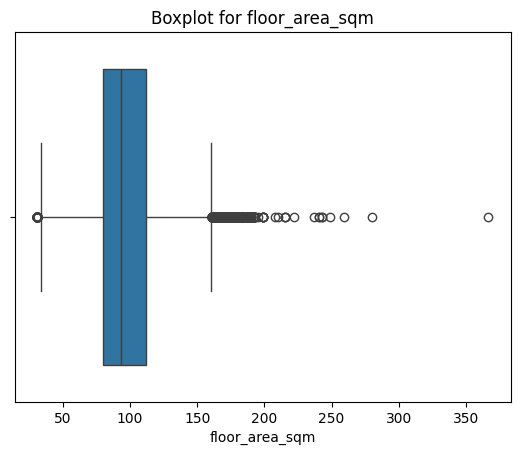

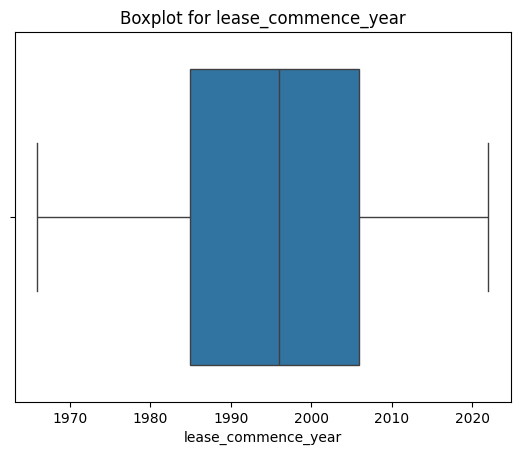

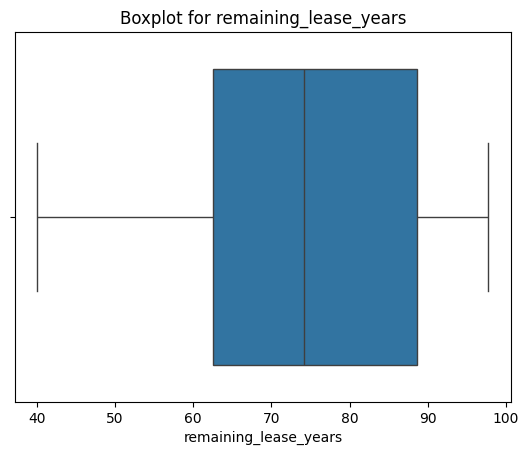

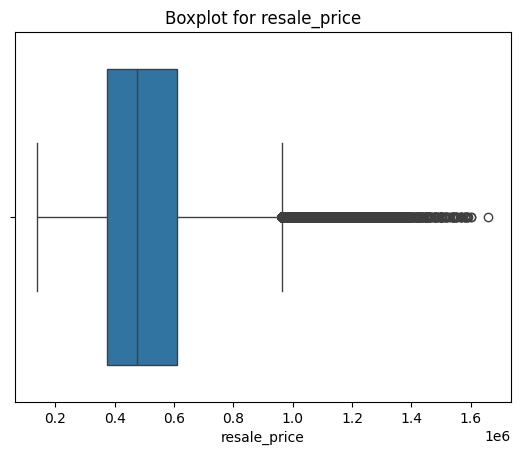

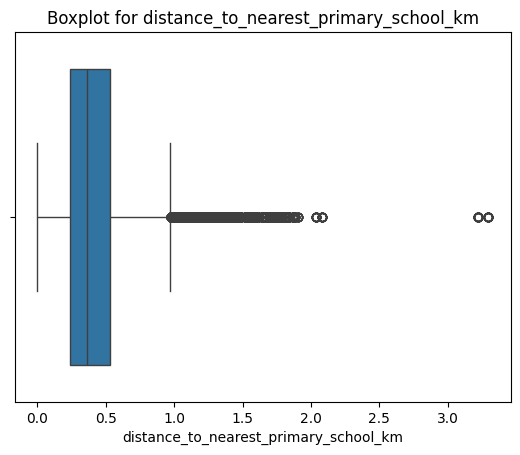

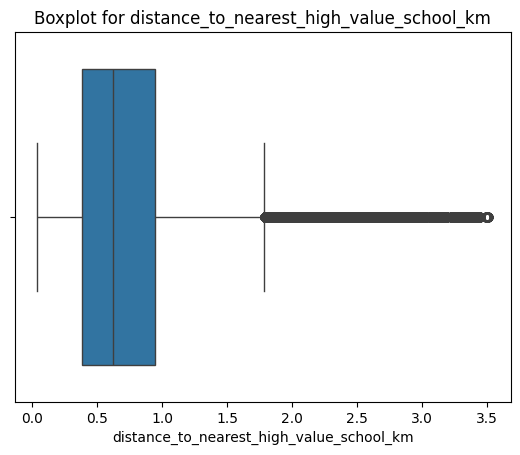

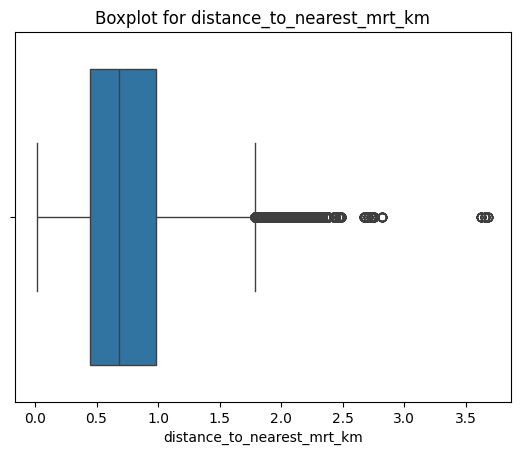

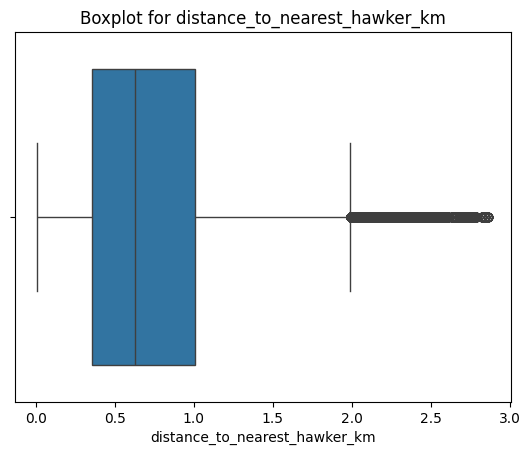

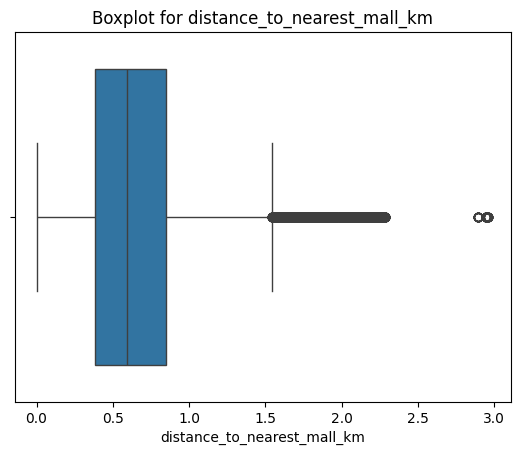

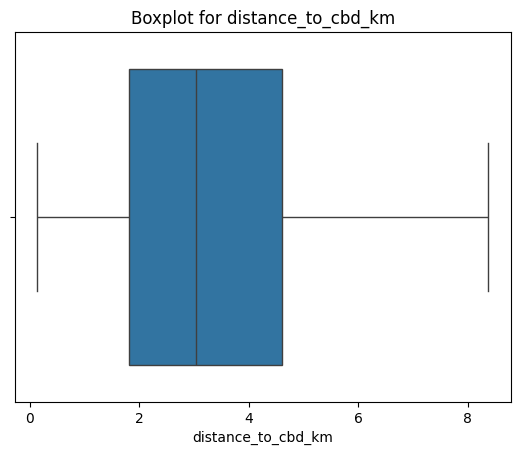

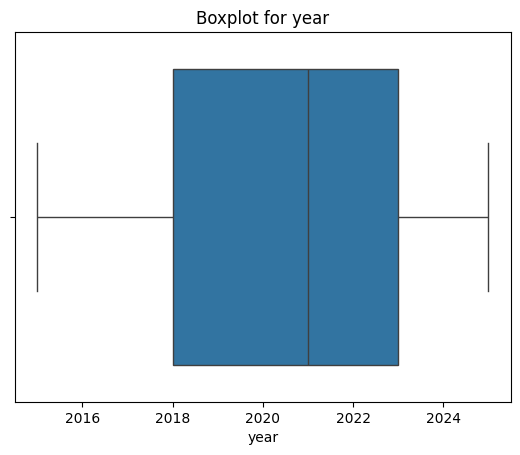

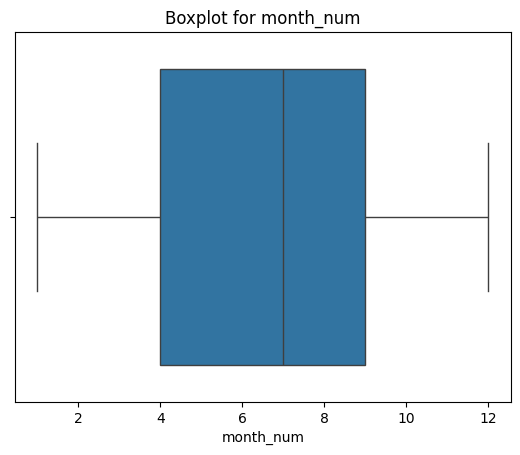

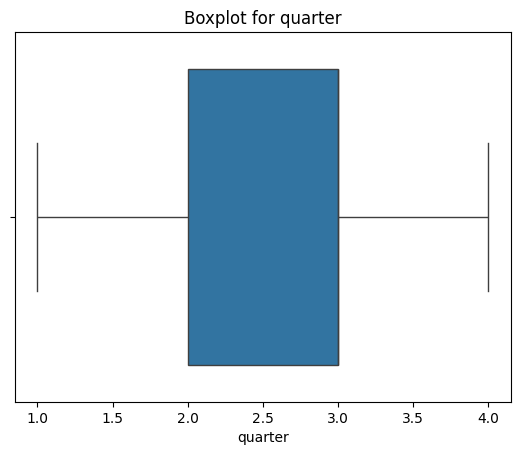

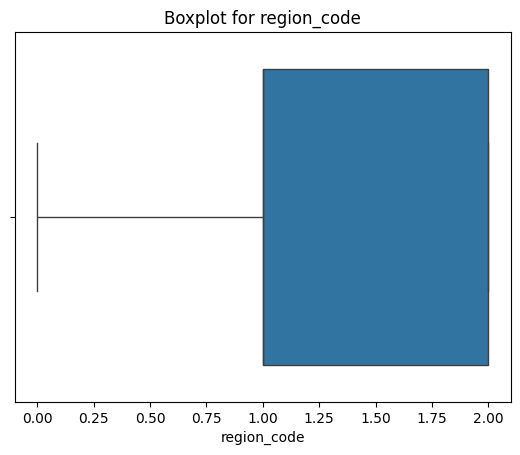

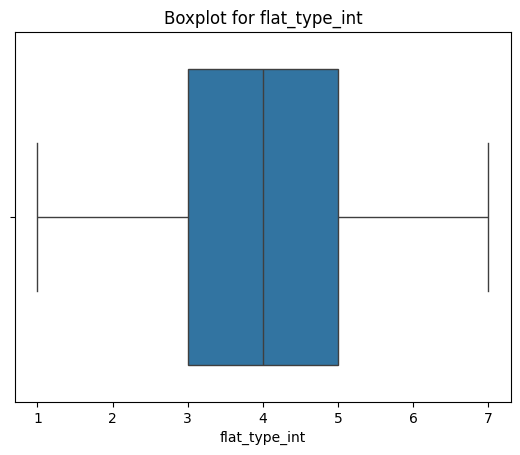

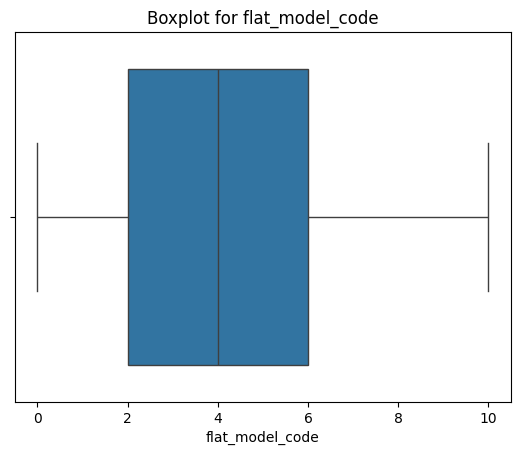

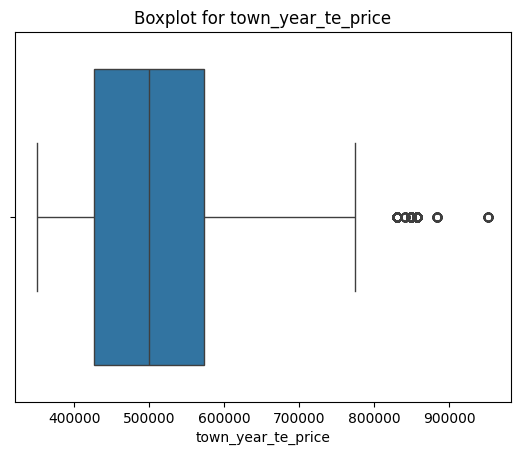

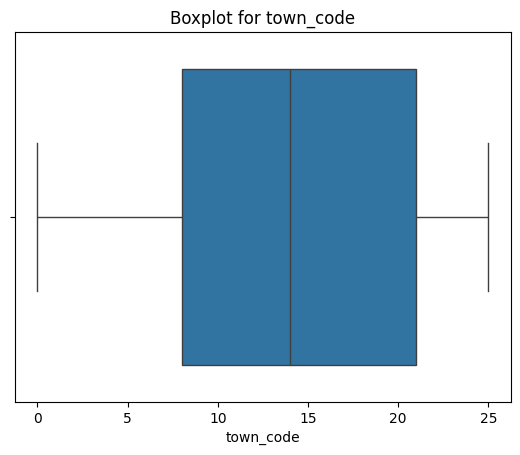

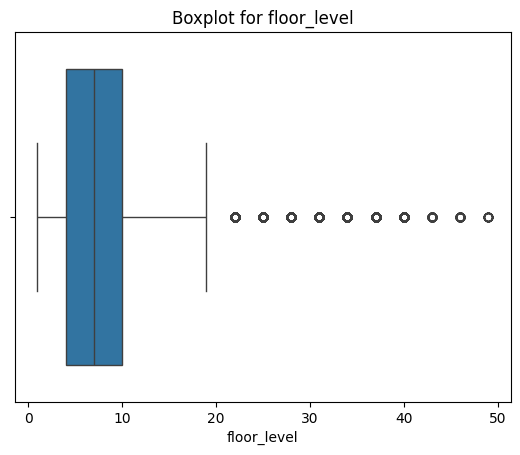

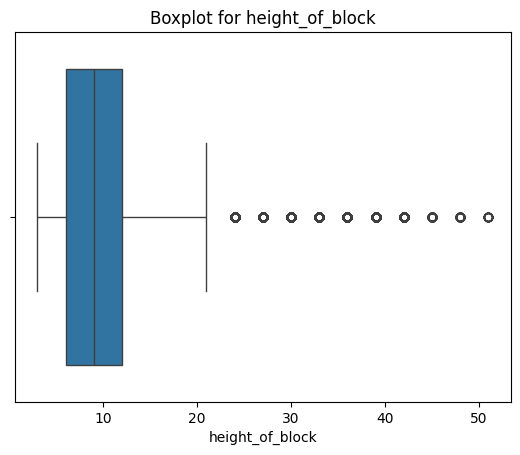

In [37]:
import seaborn as sns
for col in hdb_model.select_dtypes(include='number').columns:
    sns.boxplot(x=hdb_model[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [38]:
hdb_model.head(20
               )

,storey_range,floor_area_sqm,lease_commence_year,remaining_lease_years,resale_price,distance_to_nearest_primary_school_km,distance_to_nearest_high_value_school_km,distance_to_nearest_mrt_km,distance_to_nearest_hawker_km,distance_to_nearest_mall_km,...,year,month_num,quarter,region_code,flat_type_int,flat_model_code,town_year_te_price,town_code,floor_level,height_of_block
0,10 TO 12,44.0,1979,61.333333,232000.0,0.229176,1.132206,1.007828,0.172421,1.031165,...,2017,1,1,1,2,2,422493.497877,0,10,12
1,01 TO 03,67.0,1978,60.583333,250000.0,0.242230,0.542722,0.347375,0.410549,0.869084,...,2017,1,1,1,3,6,422493.497877,0,1,3
2,01 TO 03,67.0,1980,62.416667,262000.0,0.775873,0.766363,0.465179,0.585526,1.529048,...,2017,1,1,1,3,6,422493.497877,0,1,3
3,04 TO 06,68.0,1980,62.083333,265000.0,0.690955,0.880945,0.943668,0.245974,0.891970,...,2017,1,1,1,3,6,422493.497877,0,4,6
4,01 TO 03,67.0,1980,62.416667,265000.0,0.781447,0.799446,0.428090,0.611023,1.572926,...,2017,1,1,1,3,6,422493.497877,0,1,3
5,01 TO 03,68.0,1981,63.000000,275000.0,0.135420,0.916820,0.654237,0.404997,0.696727,...,2017,1,1,1,3,6,422493.497877,0,1,3
6,04 TO 06,68.0,1979,61.500000,280000.0,0.587394,0.683459,0.760243,0.096076,0.875350,...,2017,1,1,1,3,6,422493.497877,0,4,6
7,04 TO 06,67.0,1976,58.333333,285000.0,0.522957,1.092916,0.652203,0.299888,0.877187,...,2017,1,1,1,3,6,422493.497877,0,4,6
8,04 TO 06,68.0,1979,61.500000,285000.0,0.587394,0.683459,0.760243,0.096076,0.875350,...,2017,1,1,1,3,6,422493.497877,0,4,6
9,01 TO 03,67.0,1979,61.333333,285000.0,0.406382,0.406382,0.585928,0.259782,0.730031,...,2017,1,1,1,3,6,422493.497877,0,1,3


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Define target
y = hdb_model['resale_price']

# Example: test with all features you like, for instance these:
features_to_test = [
    'floor_area_sqm',
    'lease_commence_year',
    'remaining_lease_years',
    'distance_to_nearest_primary_school_km',
    'distance_to_nearest_high_value_school_km',
    'distance_to_nearest_mrt_km',
    'distance_to_nearest_hawker_km',
    'distance_to_nearest_mall_km',
    'distance_to_cbd_km',
    'year',
    'month_num',
    'quarter',
    'region_code',
    'flat_type_int',
    'flat_model_code',
    'town_year_te_price'
]

X = hdb_model[features_to_test].copy()

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MAE: {mae:.2f}")
print(f"Test R²: {r2:.4f}")


Test MAE: 25255.48
Test R²: 0.9606


In [40]:
# Remove features not usable or redundant for prediction:
# - 'town_year_te_price' is target encoding based on resale price, not available at prediction time
# - 'remaining_lease_years' is nearly identical to 'lease_commence_year' (almost perfect correlation)
hdb_model = hdb_model.drop(columns=['town_year_te_price', 'remaining_lease_years','height_of_block'])

In [41]:
hdb_model = hdb_model.drop(columns=['storey_range'])

In [42]:
hdb_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254525 entries, 0 to 254524
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   floor_area_sqm                            254525 non-null  float64
 1   lease_commence_year                       254525 non-null  int32  
 2   resale_price                              254525 non-null  float64
 3   distance_to_nearest_primary_school_km     254525 non-null  float64
 4   distance_to_nearest_high_value_school_km  254525 non-null  float64
 5   distance_to_nearest_mrt_km                254525 non-null  float64
 6   distance_to_nearest_hawker_km             254525 non-null  float64
 7   distance_to_nearest_mall_km               254525 non-null  float64
 8   distance_to_cbd_km                        254525 non-null  float64
 9   year                                      254525 non-null  int32  
 10  month_num           

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Now all columns (except target) should be numeric
features = hdb_model.select_dtypes(include=['number']).columns.drop('resale_price')

X = hdb_model[features]
y = hdb_model['resale_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MAE: {mae:.2f}")
print(f"Test R²: {r2:.4f}")


Test MAE: 19851.26
Test R²: 0.9753


In [44]:
print(hdb_model.iloc[7400])


floor_area_sqm                                  90.000000
lease_commence_year                           2009.000000
resale_price                                535000.000000
distance_to_nearest_primary_school_km            0.267390
distance_to_nearest_high_value_school_km         0.565749
distance_to_nearest_mrt_km                       0.132489
distance_to_nearest_hawker_km                    0.140665
distance_to_nearest_mall_km                      0.189574
distance_to_cbd_km                               3.572173
year                                          2017.000000
month_num                                        5.000000
quarter                                          2.000000
region_code                                      1.000000
flat_type_int                                    4.000000
flat_model_code                                  8.000000
town_code                                       20.000000
floor_level                                     10.000000
Name: 7400, dt

In [45]:
print(hdb_model["distance_to_cbd_km"])

0         5.710788
1         5.640185
2         5.063082
3         5.158698
4         5.058367
            ...   
254520    4.580917
254521    4.031158
254522    3.313124
254523    3.649145
254524    3.328372
Name: distance_to_cbd_km, Length: 254525, dtype: float64


In [46]:
hdb_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254525 entries, 0 to 254524
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   floor_area_sqm                            254525 non-null  float64
 1   lease_commence_year                       254525 non-null  int32  
 2   resale_price                              254525 non-null  float64
 3   distance_to_nearest_primary_school_km     254525 non-null  float64
 4   distance_to_nearest_high_value_school_km  254525 non-null  float64
 5   distance_to_nearest_mrt_km                254525 non-null  float64
 6   distance_to_nearest_hawker_km             254525 non-null  float64
 7   distance_to_nearest_mall_km               254525 non-null  float64
 8   distance_to_cbd_km                        254525 non-null  float64
 9   year                                      254525 non-null  int32  
 10  month_num           

In [47]:
hdb_model.to_csv('HDB_model_ready.csv', index=False)
print("Saved dataset to HDB_model_ready.csv")

Saved dataset to HDB_model_ready.csv
